# COVID-19 DATASET

We have taken a small dataset of covid-19 . The dataset is available in CSV file , downloaded from kaggle .
We will analyze the data using pandas DataFrame.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"4. covid_19_data.csv")

In [3]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

There are some null values in State column

In [5]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

### Importing seaborn and matplotlib for data visulazation

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 


<AxesSubplot: >

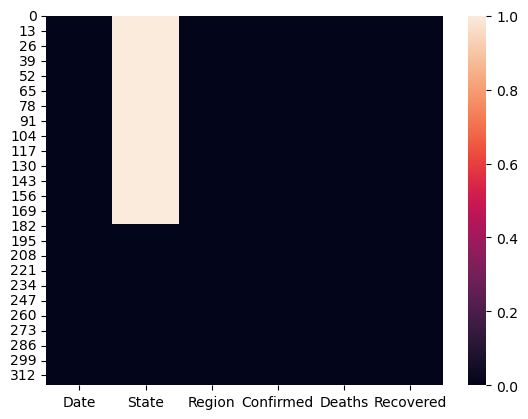

In [7]:
sns.heatmap(df.isnull())

from above graph the whitish portion is for null values

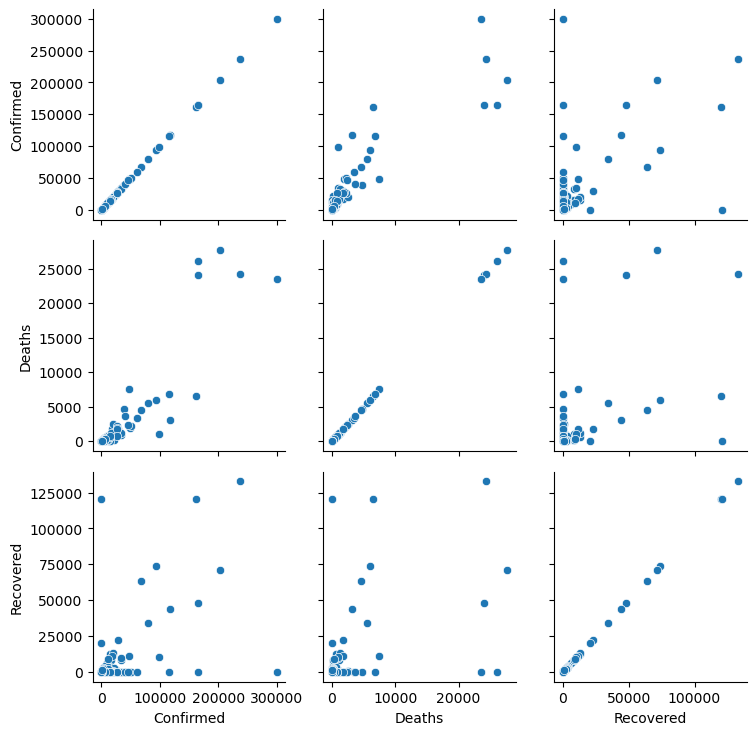

In [46]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

### 1. Show the number of Confirmed, Deaths and Recovered cases in each Region.

In [20]:
df.groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


#### Checking which country has highest confirmed cases

In [22]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False)

Region
US                       1039909
Spain                     236899
Italy                     203591
France                    166543
UK                        166441
                          ...   
Sao Tome and Principe          8
Papua New Guinea               8
Bhutan                         7
Western Sahara                 6
Yemen                          6
Name: Confirmed, Length: 187, dtype: int64

'sort_values()' is used in above data frame to show it in descendig order

#### US has highest number of infection followed by Spain,Italy and France

In [25]:
df.groupby('Region')['Confirmed','Recovered'].sum()

C:\Users\utsha\AppData\Local\Temp\ipykernel_2480\106003874.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Region')['Confirmed','Recovered'].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


### 2. Remove all the records where the Confirmed Cases is Less Than 10.

In [32]:
df = df[~(df['Confirmed'] < 10 )]      #to remove any conditions from dataFrame


In [33]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [12]:
df2 = df[~(df['Confirmed'] < 100000 )] 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 57 to 265
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       8 non-null      object
 1   State      2 non-null      object
 2   Region     8 non-null      object
 3   Confirmed  8 non-null      int64 
 4   Deaths     8 non-null      int64 
 5   Recovered  8 non-null      int64 
dtypes: int64(3), object(3)
memory usage: 448.0+ bytes


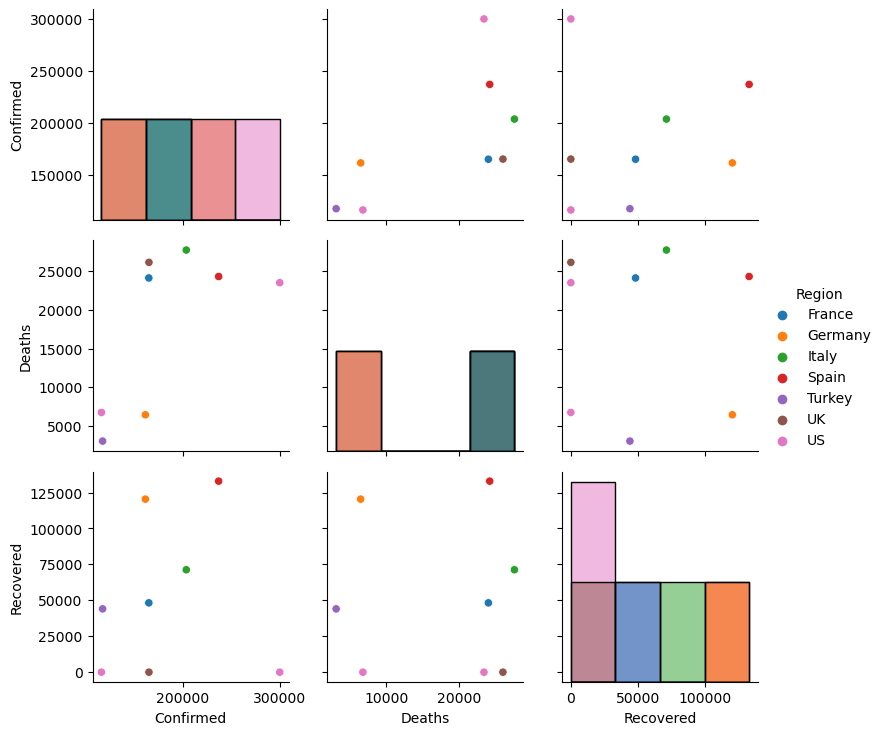

In [13]:
g = sns.PairGrid(df2, hue="Region")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### 3. In which Region, maximum number of Confirmed cases were recorded ?

In [14]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

Above are the ten countries that recorded most number of covid cases

### 4.In which Region, minimum number of Deaths cases were recorded ?

In [42]:
df.groupby('Region')['Deaths'].sum().sort_values().head(30)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

### 3.How many Confirmed, Deaths & Recovered cases were reported from India till 29 April 2020 ?

In [46]:
df[df['Region'] == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


### 6.Sort the entire data wrt No. of Confirmed cases in ascending order.

In [48]:
df.sort_values(by = ['Confirmed'], ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929
